<a href="https://colab.research.google.com/github/Lintang20/DQLab_Project-Data-Analysis-for-B2B-Retail_-Customer-Analytics-Report.md/blob/main/Answer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline 
import warnings 
warnings.filterwarnings('ignore')

In [5]:
train = pd.read_csv('/content/drive/MyDrive/Biodata diri/Indodana/DS1/app_train.csv') 
train.head()

,Unnamed: 0,LN_ID,TARGET,CONTRACT_TYPE,GENDER,NUM_CHILDREN,INCOME,APPROVED_CREDIT,ANNUITY,PRICE,...,DAYS_AGE,DAYS_WORK,DAYS_REGISTRATION,DAYS_ID_CHANGE,WEEKDAYS_APPLY,HOUR_APPLY,ORGANIZATION_TYPE,EXT_SCORE_1,EXT_SCORE_2,EXT_SCORE_3
0,201468,333538,0,Revolving loans,F,1,67500.0,202500.0,10125.0,202500.0,...,-11539,-921,-119.0,-2757,TUESDAY,18,Business Entity Type 3,0.572805,0.608276,NaN
1,264803,406644,0,Cash loans,F,1,202500.0,976711.5,49869.0,873000.0,...,-15743,-4482,-1797.0,-2455,TUESDAY,14,Other,0.655600,0.684298,NaN
2,137208,259130,0,Cash loans,F,0,180000.0,407520.0,25060.5,360000.0,...,-20775,365243,-8737.0,-4312,THURSDAY,14,NA1,NaN,0.580687,0.749022
3,269220,411997,0,Cash loans,M,0,225000.0,808650.0,26086.5,675000.0,...,-20659,-10455,-4998.0,-4010,WEDNESDAY,10,Culture,NaN,0.623740,0.710674
4,122096,241559,0,Revolving loans,M,0,135000.0,180000.0,9000.0,180000.0,...,-9013,-1190,-3524.0,-1644,SUNDAY,11,Construction,0.175511,0.492994,0.085595


In [6]:
test = pd.read_csv('/content/drive/MyDrive/Biodata diri/Indodana/DS1/app_test.csv') 
test.head()

,Unnamed: 0,LN_ID,TARGET,CONTRACT_TYPE,GENDER,NUM_CHILDREN,INCOME,APPROVED_CREDIT,ANNUITY,PRICE,...,DAYS_AGE,DAYS_WORK,DAYS_REGISTRATION,DAYS_ID_CHANGE,WEEKDAYS_APPLY,HOUR_APPLY,ORGANIZATION_TYPE,EXT_SCORE_1,EXT_SCORE_2,EXT_SCORE_3
0,102590,219092,0,Cash loans,M,3,135000.0,871029.0,44604.0,765000.0,...,-17598,-2650,-1411.0,-1131,SATURDAY,7,Business Entity Type 3,NaN,0.145475,0.651260
1,35895,141577,0,Cash loans,F,0,144000.0,485640.0,34537.5,450000.0,...,-14097,-7408,-7908.0,-4872,MONDAY,14,Kindergarten,NaN,0.682675,NaN
2,69154,180205,0,Cash loans,F,1,90000.0,247500.0,8887.5,247500.0,...,-18384,-2826,-8226.0,-1930,SATURDAY,12,Self-employed,0.814700,0.686312,0.758393
3,222185,357381,0,Cash loans,M,2,112500.0,506889.0,24781.5,418500.0,...,-12170,-926,-916.0,-4048,THURSDAY,13,Other,0.399219,0.266520,0.058826
4,147680,271229,0,Cash loans,M,0,216000.0,450000.0,21888.0,450000.0,...,-10790,-577,-4640.0,-2035,MONDAY,14,Business Entity Type 3,0.368452,0.610483,0.392774


In [7]:
prev = pd.read_csv('/content/drive/MyDrive/Biodata diri/Indodana/DS1/prev_app.csv') 
prev.head()

,Unnamed: 0,SK_ID_PREV,LN_ID,CONTRACT_TYPE,ANNUITY,APPLICATION,APPROVED_CREDIT,AMT_DOWN_PAYMENT,PRICE,WEEKDAYS_APPLY,HOUR_APPLY,CONTRACT_STATUS,DAYS_DECISION,TERM_PAYMENT,YIELD_GROUP,FIRST_DRAW,FIRST_DUE,TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Approved,-73,12.0,middle,365243.0,-42.0,-37.0,0.0
1,3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Approved,-512,12.0,middle,365243.0,-482.0,-177.0,1.0
2,5,1383531,199383,Cash loans,23703.930,315000.0,340573.5,NaN,315000.0,SATURDAY,8,Approved,-684,18.0,low_normal,365243.0,-654.0,-137.0,1.0
3,6,2315218,175704,Cash loans,NaN,0.0,0.0,NaN,NaN,TUESDAY,11,Canceled,-14,NaN,NA1,NaN,NaN,NaN,NaN
4,10,1715995,447712,Cash loans,11368.620,270000.0,335754.0,NaN,270000.0,FRIDAY,7,Approved,-735,54.0,low_normal,365243.0,-705.0,-334.0,1.0


In [8]:
installment = pd.read_csv('/content/drive/MyDrive/Biodata diri/Indodana/DS1/installment_payment.csv') 
installment.head()

,Unnamed: 0,SK_ID_PREV,LN_ID,INST_NUMBER,INST_DAYS,PAY_DAYS,AMT_INST,AMT_PAY
0,5,1137312,164489,12,-1384.0,-1417.0,5970.375,5970.375
1,8,2723183,112102,14,-197.0,-197.0,70.740,70.740
2,11,2558880,154793,8,-1262.0,-1269.0,15031.080,15031.080
3,17,1410565,197687,1,-1037.0,-1048.0,12514.050,12510.450
4,18,2391610,183431,20,-1680.0,-1693.0,7875.000,7875.000


In [9]:
train_original=train.copy() 
test_original=test.copy()
prev_original=prev.copy()
installment_original=installment.copy()

In [10]:
train.columns

Index(['Unnamed: 0', 'LN_ID', 'TARGET', 'CONTRACT_TYPE', 'GENDER',
       'NUM_CHILDREN', 'INCOME', 'APPROVED_CREDIT', 'ANNUITY', 'PRICE',
       'INCOME_TYPE', 'EDUCATION', 'FAMILY_STATUS', 'HOUSING_TYPE', 'DAYS_AGE',
       'DAYS_WORK', 'DAYS_REGISTRATION', 'DAYS_ID_CHANGE', 'WEEKDAYS_APPLY',
       'HOUR_APPLY', 'ORGANIZATION_TYPE', 'EXT_SCORE_1', 'EXT_SCORE_2',
       'EXT_SCORE_3'],
      dtype='object')

In [11]:
test.columns


Index(['Unnamed: 0', 'LN_ID', 'TARGET', 'CONTRACT_TYPE', 'GENDER',
       'NUM_CHILDREN', 'INCOME', 'APPROVED_CREDIT', 'ANNUITY', 'PRICE',
       'INCOME_TYPE', 'EDUCATION', 'FAMILY_STATUS', 'HOUSING_TYPE', 'DAYS_AGE',
       'DAYS_WORK', 'DAYS_REGISTRATION', 'DAYS_ID_CHANGE', 'WEEKDAYS_APPLY',
       'HOUR_APPLY', 'ORGANIZATION_TYPE', 'EXT_SCORE_1', 'EXT_SCORE_2',
       'EXT_SCORE_3'],
      dtype='object')

In [12]:
prev.columns

Index(['Unnamed: 0', 'SK_ID_PREV', 'LN_ID', 'CONTRACT_TYPE', 'ANNUITY',
       'APPLICATION', 'APPROVED_CREDIT', 'AMT_DOWN_PAYMENT', 'PRICE',
       'WEEKDAYS_APPLY', 'HOUR_APPLY', 'CONTRACT_STATUS', 'DAYS_DECISION',
       'TERM_PAYMENT', 'YIELD_GROUP', 'FIRST_DRAW', 'FIRST_DUE', 'TERMINATION',
       'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')

In [13]:
installment.columns

Index(['Unnamed: 0', 'SK_ID_PREV', 'LN_ID', 'INST_NUMBER', 'INST_DAYS',
       'PAY_DAYS', 'AMT_INST', 'AMT_PAY'],
      dtype='object')

In [14]:
train.dtypes

Unnamed: 0             int64
LN_ID                  int64
TARGET                 int64
CONTRACT_TYPE         object
GENDER                object
NUM_CHILDREN           int64
INCOME               float64
APPROVED_CREDIT      float64
ANNUITY              float64
PRICE                float64
INCOME_TYPE           object
EDUCATION             object
FAMILY_STATUS         object
HOUSING_TYPE          object
DAYS_AGE               int64
DAYS_WORK              int64
DAYS_REGISTRATION    float64
DAYS_ID_CHANGE         int64
WEEKDAYS_APPLY        object
HOUR_APPLY             int64
ORGANIZATION_TYPE     object
EXT_SCORE_1          float64
EXT_SCORE_2          float64
EXT_SCORE_3          float64
dtype: object

In [15]:
prev.dtypes

Unnamed: 0                     int64
SK_ID_PREV                     int64
LN_ID                          int64
CONTRACT_TYPE                 object
ANNUITY                      float64
APPLICATION                  float64
APPROVED_CREDIT              float64
AMT_DOWN_PAYMENT             float64
PRICE                        float64
WEEKDAYS_APPLY                object
HOUR_APPLY                     int64
CONTRACT_STATUS               object
DAYS_DECISION                  int64
TERM_PAYMENT                 float64
YIELD_GROUP                   object
FIRST_DRAW                   float64
FIRST_DUE                    float64
TERMINATION                  float64
NFLAG_INSURED_ON_APPROVAL    float64
dtype: object

In [16]:
train.shape

(61503, 24)

In [17]:
test.shape


(14761, 24)

In [18]:
prev['CONTRACT_STATUS'].value_counts()



Approved        219687
Canceled         64590
Refused          60795
Unused offer      5640
Name: CONTRACT_STATUS, dtype: int64

In [19]:
prev['CONTRACT_STATUS'].value_counts(normalize=True) 



Approved        0.626403
Canceled        0.184168
Refused         0.173347
Unused offer    0.016082
Name: CONTRACT_STATUS, dtype: float64

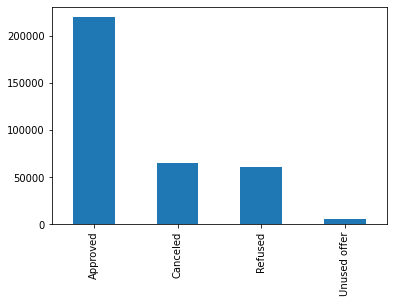

In [20]:
prev['CONTRACT_STATUS'].value_counts().plot.bar()

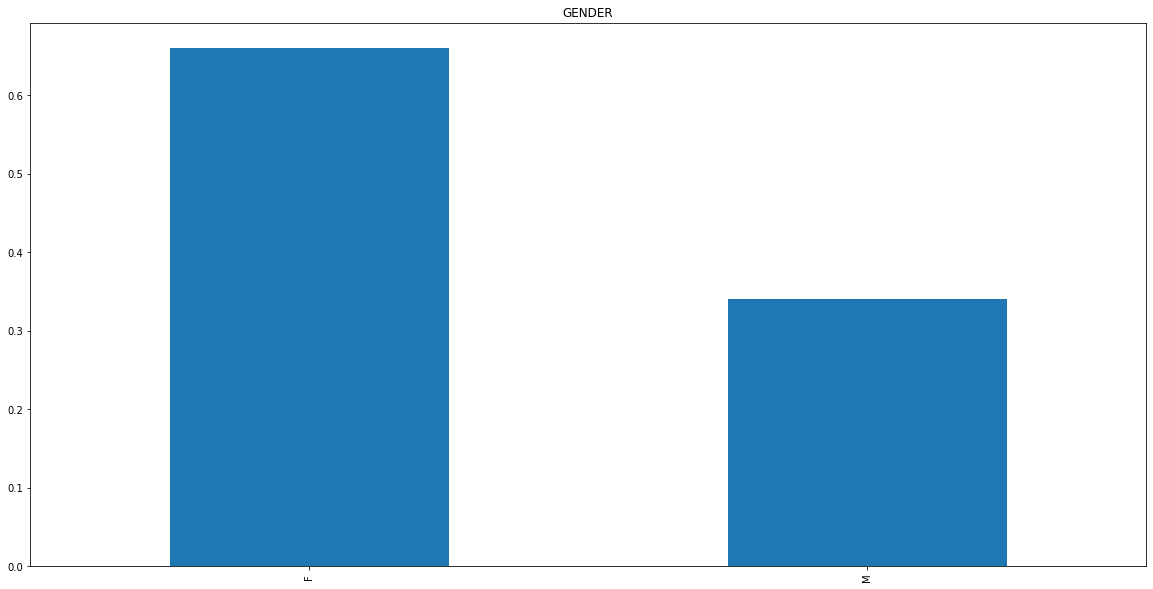

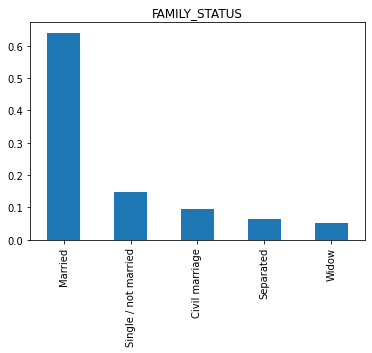

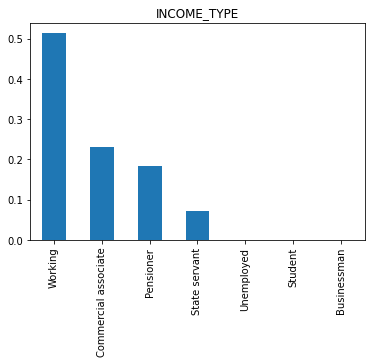

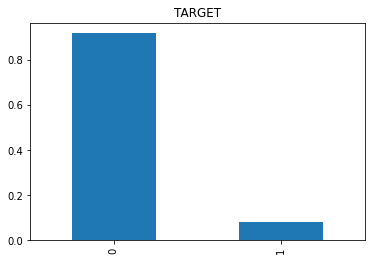

In [21]:
train['GENDER'].value_counts(normalize=True).plot.bar(figsize=(20,10), title='GENDER')
plt.show()
train['FAMILY_STATUS'].value_counts(normalize=True).plot.bar(title='FAMILY_STATUS')
plt.show()
train['INCOME_TYPE'].value_counts(normalize=True).plot.bar(title='INCOME_TYPE')
plt.show()
train['TARGET'].value_counts(normalize=True).plot.bar(title='TARGET')
plt.show()

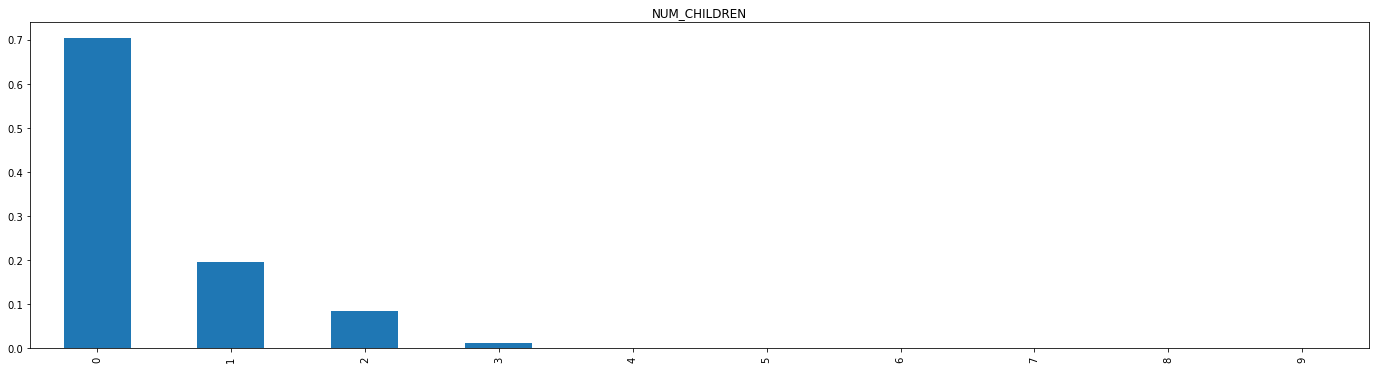

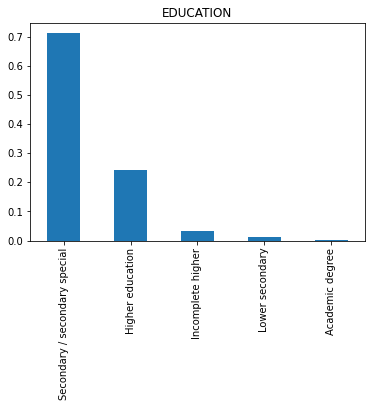

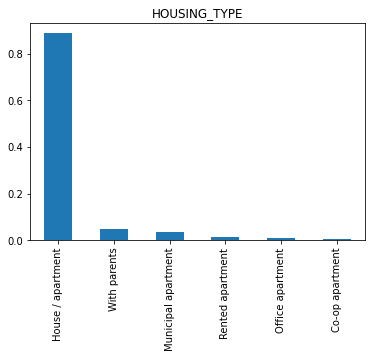

In [22]:
train['NUM_CHILDREN'].value_counts(normalize=True).plot.bar(figsize=(24,6), title='NUM_CHILDREN')
plt.show()
train['EDUCATION'].value_counts(normalize=True).plot.bar(title='EDUCATION')
plt.show()
train['HOUSING_TYPE'].value_counts(normalize=True).plot.bar(title='HOUSING_TYPE')
plt.show()

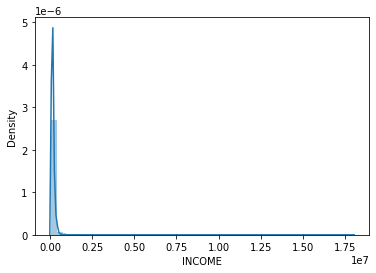

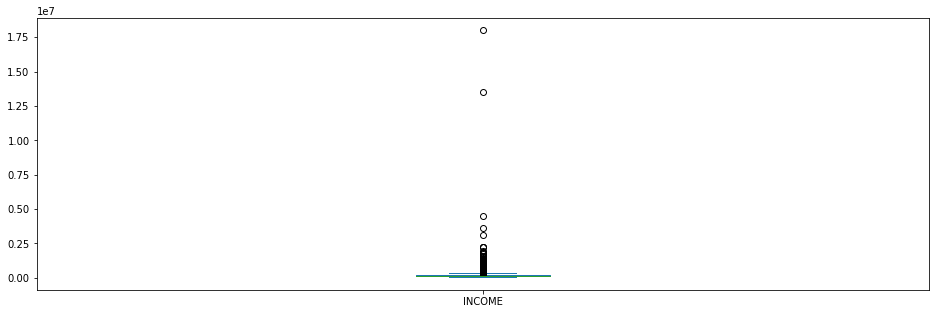

In [23]:
sns.distplot(train['INCOME'])
plt.show()
train['INCOME'].plot.box(figsize=(16,5))
plt.show()

Text(0.5, 0.98, '')

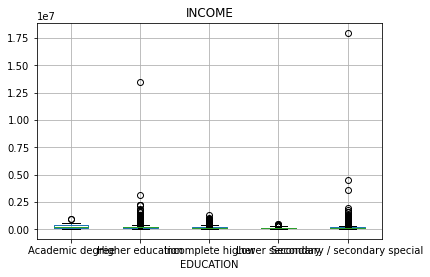

In [24]:
train.boxplot(column='INCOME', by = 'EDUCATION') 
plt.suptitle("")

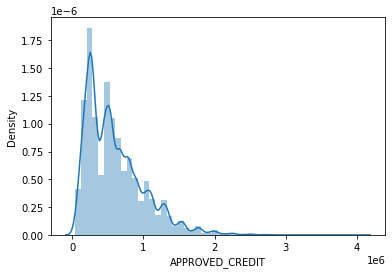

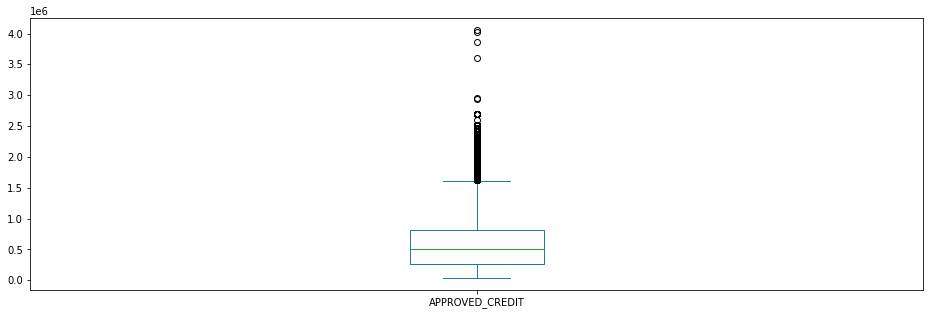

In [25]:
train.notna()
sns.distplot(train['APPROVED_CREDIT'])
plt.show()
train['APPROVED_CREDIT'].plot.box(figsize=(16,5))
plt.show()

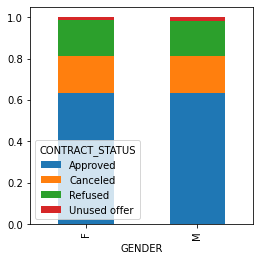

In [26]:
Gender=pd.crosstab(train['GENDER'],prev['CONTRACT_STATUS'])
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.show()

#It can be inferred that the proportion of male and female applicants is more or less the same for both approved and unapproved loans.

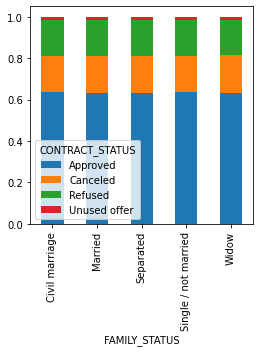

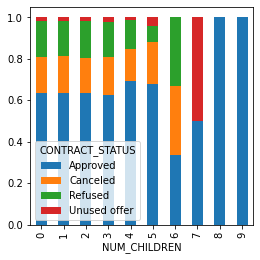

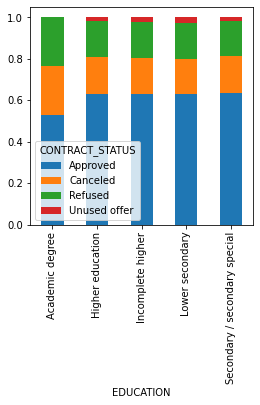

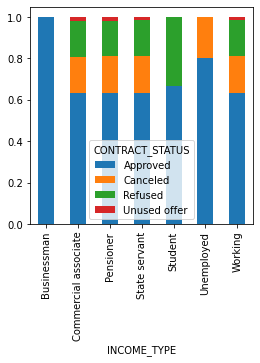

In [27]:
Family_Status=pd.crosstab(train['FAMILY_STATUS'],prev['CONTRACT_STATUS'])
Num_Children=pd.crosstab(train['NUM_CHILDREN'],prev['CONTRACT_STATUS'])
Education=pd.crosstab(train['EDUCATION'],prev['CONTRACT_STATUS'])
Income_Type=pd.crosstab(train['INCOME_TYPE'],prev['CONTRACT_STATUS'])
Family_Status.div(Family_Status.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.show()
Num_Children.div(Num_Children.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.show()
Education.div(Education.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.show()
Income_Type.div(Income_Type.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.show()

#The proportion of FAMILY_STATUS applicants is higher for approved loans.
#Distribution of applicants with 1 or 3+ dependents is similar across both the categories of CONTRACT_STATUS.
#There is nothing significant we can infer from INCOME_TYPE vs CONTRACT_STATUS plot.

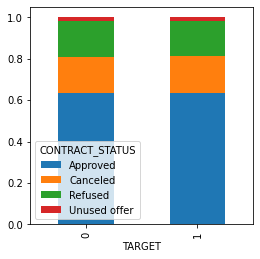

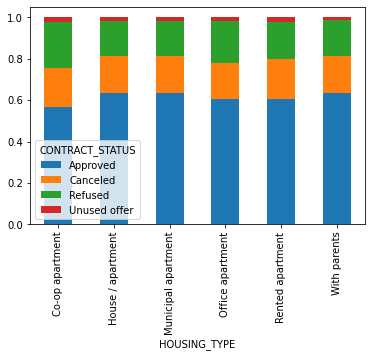

In [28]:
Target=pd.crosstab(train['TARGET'],prev['CONTRACT_STATUS']) 
Housing_Type=pd.crosstab(train['HOUSING_TYPE'],prev['CONTRACT_STATUS']) 
Target.div(Target.sum(1) .astype(float), axis=0).plot(kind='bar',stacked=True,figsize=(4,4)) 
plt.show() 
Housing_Type.div(Housing_Type.sum(1).astype(float ), axis=0).plot(kind='bar',stacked=True) 
plt.show()

#It seems people with a Target as 1 are more likely to get their loans approved.
#The proportion of loans getting approved in the House/Apartment is higher as compared to another else.


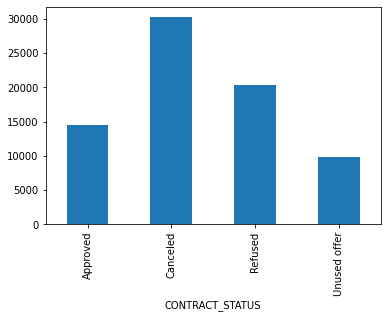

In [29]:
prev.groupby('CONTRACT_STATUS')['ANNUITY'].mean().plot.bar()


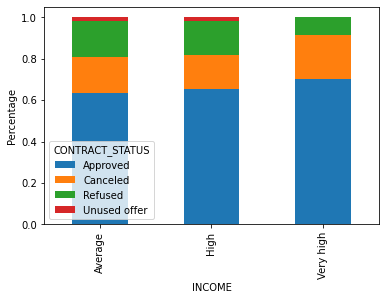

In [30]:
bins=[0,12500,425000,775500,910000]
group=['Low','Average','High','Very high']
train['Income_bin']=pd.cut(train['INCOME'],bins,labels=group)
Income_bin=pd.crosstab(train['Income_bin'],prev['CONTRACT_STATUS'])
Income_bin.div(Income_bin.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True)
plt.xlabel('INCOME')
P=plt.ylabel('Percentage')

#It can be inferred that Applicant's income does not affect the chances of loan approval which contradicts our hypothesis in which we assumed that if the applicant's income is high the chances of loan approval will also be high.

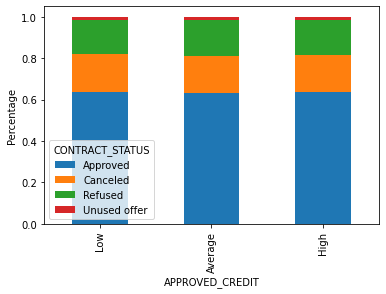

In [31]:
bins=[0,100000,400000,800000]
group=['Low','Average','High']
train['APPROVED_CREDIT_bin']=pd.cut(train['APPROVED_CREDIT'],bins,labels=group)
APPROVED_CREDIT_bin=pd.crosstab(train['APPROVED_CREDIT_bin'],prev['CONTRACT_STATUS'])
APPROVED_CREDIT_bin.div(APPROVED_CREDIT_bin.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True)
plt.xlabel('APPROVED_CREDIT')
P=plt.ylabel('Percentage')

In [32]:
train=train.drop(['Income_bin', 'APPROVED_CREDIT_bin'], axis=1)
train['NUM_CHILDREN'].replace('3+', 3,inplace=True)
test['NUM_CHILDREN'].replace('3+', 3,inplace=True)
prev['CONTRACT_STATUS'].replace('N', 0,inplace=True)
prev['CONTRACT_STATUS'].replace('Y', 1,inplace=True)

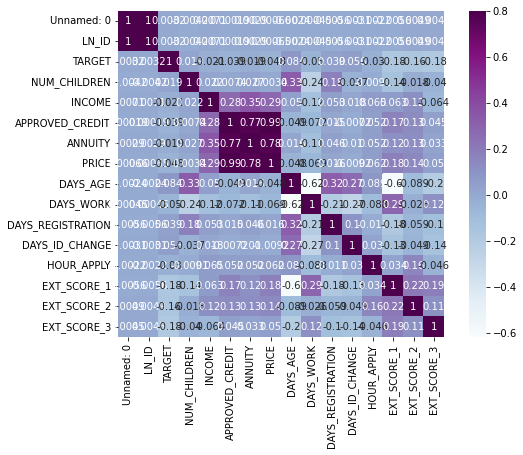

In [33]:
matrix = train.corr()
f, ax = plt.subplots(figsize=(9,6))
sns.heatmap(matrix,vmax=.8,square=True,cmap='BuPu', annot = True)

In [34]:
train.isnull().sum()

Unnamed: 0               0
LN_ID                    0
TARGET                   0
CONTRACT_TYPE            0
GENDER                   0
NUM_CHILDREN             0
INCOME                   0
APPROVED_CREDIT          0
ANNUITY                  1
PRICE                   62
INCOME_TYPE              0
EDUCATION                0
FAMILY_STATUS            0
HOUSING_TYPE             0
DAYS_AGE                 0
DAYS_WORK                0
DAYS_REGISTRATION        0
DAYS_ID_CHANGE           0
WEEKDAYS_APPLY           0
HOUR_APPLY               0
ORGANIZATION_TYPE        0
EXT_SCORE_1          34845
EXT_SCORE_2            134
EXT_SCORE_3          12239
dtype: int64

In [35]:
train['ANNUITY'].fillna(train['ANNUITY'].mode()[0], inplace=True) 
train['PRICE'].fillna(train['PRICE'].mode()[0], inplace=True) 

In [36]:
train['PRICE'].value_counts()

450000.0     5337
225000.0     5103
675000.0     5028
900000.0     3103
270000.0     2196
             ... 
1476000.0       1
1948500.0       1
4050000.0       1
2196000.0       1
466083.0        1
Name: PRICE, Length: 541, dtype: int64

In [37]:
train['PRICE'].fillna(train['PRICE'].mode()[0], inplace=True)

In [40]:
train['APPROVED_CREDIT'].fillna(train['APPROVED_CREDIT'].median(), inplace=True)


In [41]:
train.isnull().sum()


Unnamed: 0               0
LN_ID                    0
TARGET                   0
CONTRACT_TYPE            0
GENDER                   0
NUM_CHILDREN             0
INCOME                   0
APPROVED_CREDIT          0
ANNUITY                  0
PRICE                    0
INCOME_TYPE              0
EDUCATION                0
FAMILY_STATUS            0
HOUSING_TYPE             0
DAYS_AGE                 0
DAYS_WORK                0
DAYS_REGISTRATION        0
DAYS_ID_CHANGE           0
WEEKDAYS_APPLY           0
HOUR_APPLY               0
ORGANIZATION_TYPE        0
EXT_SCORE_1          34845
EXT_SCORE_2            134
EXT_SCORE_3          12239
dtype: int64

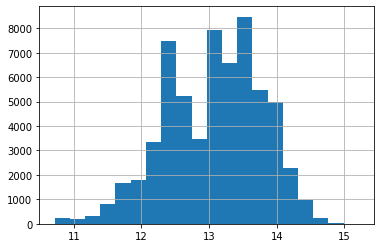

In [42]:
train['APPROVED_CREDIT_log']=np.log(train['APPROVED_CREDIT']) 
train['APPROVED_CREDIT_log'].hist(bins=20) 
test['APPROVED_CREDIT_log']=np.log(test['APPROVED_CREDIT'])

In [43]:
#Logistic Regression which is used for predicting binary outcome

train=train.drop('LN_ID',axis=1)
test=test.drop('LN_ID',axis=1)

In [44]:
X = prev.drop('CONTRACT_STATUS',1)
y = prev.CONTRACT_STATUS

In [45]:
X = pd.get_dummies(X)
train=pd.get_dummies(train)
test=pd.get_dummies(test)

In [46]:
from sklearn.model_selection import train_test_split
x_train, x_cv, y_train, y_cv = train_test_split(X,y, test_size=0.3)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model = LogisticRegression()
model.fit(x_train, y_train)


In [ ]:
pred_cv = model.predict(x_cv)
accuracy_score(y_cv,pred_cv)

In [53]:
X = prev.drop('CONTRACT_STATUS',1)
y = prev.CONTRACT_STATUS

In [54]:

from sklearn.model_selection import StratifiedKFold


In [ ]:
i=1
mean = 0
kf = StratifiedKFold(n_splits=5,random_state=(None))
for train_index,test_index in kf.split(X,y):
 print ('\n{} of kfold {} '.format(i,kf.n_splits))
 xtr,xvl = X.loc[train_index],X.loc[test_index]
 ytr,yvl = y[train_index],y[test_index]
 model = LogisticRegression(random_state=1)
 model.fit(xtr,ytr)
 pred_test=model.predict(xvl)
 score=accuracy_score(yvl,pred_test)
 mean += score
 print ('accuracy_score',score)
 i+=1
 pred_test = model.predict(test)
 pred = model.predict_proba(xvl)[:,1]
print ('\n Mean Validation Accuracy',mean/(i-1))

In [ ]:
from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(yvl, pred)
auc = metrics.roc_auc_score(yvl, pred)
plt.figure(figsize=(12,8))
plt.plot(fpr, tpr, label='validation, auc='+str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

In [ ]:
from sklearn import tree
i=1
mean = 0
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
    print ('\n{} of kfold {} '.format(i,kf.n_splits))
    xtr,xvl = X.loc[train_index],X.loc[test_index]
    ytr,yvl = y[train_index],y[test_index]
    model = tree.DecisionTreeClassifier(random_state=1)
    model.fit(xtr,ytr)
    pred_test=model.predict(xvl)
    score=accuracy_score(yvl,pred_test)
    mean += score
    print ('accuracy_score',score)
    i+=1
    pred_test = model.predict(test)
    pred = model.predict_proba(xvl)[:,1]
print ('\n Mean Validation Accuracy',mean/(i-1))